<a href="https://colab.research.google.com/github/Sabelz/Master_Thesis_Alexander/blob/main/GPs/ConcreteGPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Processes on the Concrete dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Master_Thesis_Alexander
!git config --global user.email "alexander.sabelstrom.1040@student.uu.se"
!git config --global user.name "Sabelz"

Mounted at /content/drive
/content/drive/MyDrive/Master_Thesis_Alexander


# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install gpytorch
import gpytorch
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%load_ext autoreload
%autoreload 2
%run "datasets/concrete.ipynb" # Run the Concrete notebook
%run "utils/models.ipynb" # Run the models notebook
%run "utils/functions.ipynb" # Run the functions notebook

# Set the seed for NumPy's random number generator
np.random.seed(0)

torch.manual_seed(0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.6/175.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

# Prepare The Data

In [3]:
concrete_data = df_Concrete # df_Concrete is defined in ../datasets/concrete.ipynb
# Concrete compressive strength(last feature) is the regression problem
x_concrete, y_concrete = concrete_data.iloc[:, :-1].to_numpy() , concrete_data.iloc[:, -1].to_numpy()

x_train_concrete, x_test_concrete, y_train_concrete, y_test_concrete = train_test_split(x_concrete,
                                                                                        y_concrete,
                                                                                        test_size=0.2,
                                                                                        random_state=666)
# Transform into tensors
x_train_concrete, x_test_concrete, y_train_concrete, y_test_concrete = (
torch.from_numpy(x_train_concrete).float(), torch.from_numpy(x_test_concrete).float(),
torch.from_numpy(y_train_concrete).float(), torch.from_numpy(y_test_concrete).float())

# Standardized data
scaler = StandardScaler()
x_train_concrete_standardized = torch.from_numpy(scaler.fit_transform(x_train_concrete)).float()
# Use the same scaler that was used on training data
x_test_concrete_standardized = torch.from_numpy(scaler.transform(x_test_concrete)).float()

if torch.cuda.is_available():
    x_train_concrete, y_train_concrete, x_test_concrete, y_test_concrete, x_train_concrete_standardized, x_test_concrete_standardized = (
    x_train_concrete.cuda(), y_train_concrete.cuda(), x_test_concrete.cuda(), y_test_concrete.cuda(),
    x_train_concrete_standardized.cuda(), x_test_concrete_standardized.cuda())

# Train data into batches
#train_dataset_concrete = TensorDataset(x_train_concrete, y_train_concrete)
#train_loader_concrete = DataLoader(train_dataset_concrete, batch_size=500, shuffle=True)

# Test data into batches
#test_dataset_concrete = TensorDataset(x_test_concrete, y_test_concrete)
#test_loader_concrete = DataLoader(test_dataset_concrete, batch_size=500, shuffle=False)

# Standardized batches
# Train data into batches
#train_dataset_concrete_standardized = TensorDataset(x_train_concrete_standardized, y_train_concrete)
#train_loader_concrete_standardized = DataLoader(train_dataset_concrete_standardized, batch_size=500, shuffle=True)

# Test data into batches
#test_dataset_concrete_standardized = TensorDataset(x_test_concrete_standardized, y_test_concrete)
#test_loader_concrete_standardized = DataLoader(test_dataset_concrete_standardized, batch_size=500, shuffle=False)

# Define the KISS-GP Model

/usr/local/lib/python3.10/dist-packages/linear_operator/utils/sparse.py:51: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if nonzero_indices.storage():
/usr/local/lib/python3.10/dist-packages/linear_operator/utils/sparse.py:66: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  res = cls(index_tensor, value_tensor, interp_size)


RMSE KISS-GP:  7.2601867
NLPD KISS-GP:  4.843739986419678
PICP KISS-GP:  0.6504854368932039
MPIW KISS-GP:  12.493304
Time KISS-GP:  32.14142966270447
RMSE KISS-GP Standardized:  5.098629
NLPD KISS-GP Standardized:  3.196153402328491
PICP KISS-GP Standardized:  0.8398058252427184
MPIW KISS-GP Standardized:  15.885611
Time KISS-GP Standardized:  10.658774852752686
RMSE KISS-GP:  7.2642536
NLPD KISS-GP:  4.7681660652160645
PICP KISS-GP:  0.6359223300970874
MPIW KISS-GP:  12.621907
Time KISS-GP:  12.05820369720459
RMSE KISS-GP Standardized:  5.0942416
NLPD KISS-GP Standardized:  3.220095634460449
PICP KISS-GP Standardized:  0.8592233009708737
MPIW KISS-GP Standardized:  15.926141
Time KISS-GP Standardized:  11.467707872390747
RMSE KISS-GP:  7.258349
NLPD KISS-GP:  4.822336196899414
PICP KISS-GP:  0.6699029126213593
MPIW KISS-GP:  12.548529
Time KISS-GP:  12.946196556091309
RMSE KISS-GP Standardized:  5.097421
NLPD KISS-GP Standardized:  3.2027134895324707
PICP KISS-GP Standardized:  0.8543

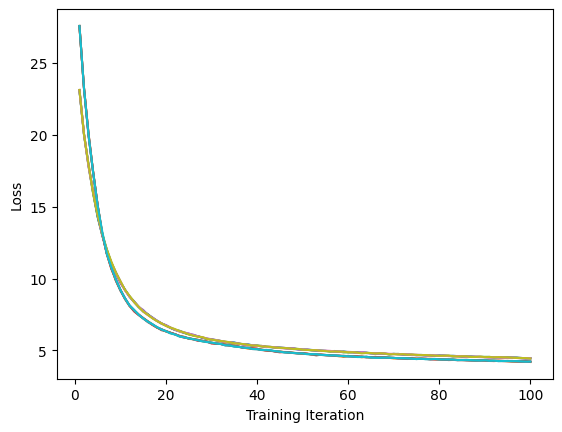

In [4]:
RMSE_list_KISSGP = []
NLPD_list_KISSGP = []
PICP_list_KISSGP = []
MPIW_list_KISSGP = []
TT_list_KISSGP = []

RMSE_list_KISSGP_s = []
NLPD_list_KISSGP_s = []
PICP_list_KISSGP_s = []
MPIW_list_KISSGP_s = []
TT_list_KISSGP_s = []


for _ in range(0,5):

  KISSGP_likelihood_concrete = gpytorch.likelihoods.GaussianLikelihood() # Likelihood
  KISSGP_mean_concrete = gpytorch.means.ConstantMean() # Mean
  KISSGP_kernel_concrete = gpytorch.kernels.RBFKernel() # Kernel
  KISSGP_model_concrete = KISSGP_NDim(x_train_concrete,
                                  y_train_concrete,
                                  KISSGP_likelihood_concrete,
                                  KISSGP_mean_concrete,
                                  KISSGP_kernel_concrete) # KISSGP defined in utils/Models.ipynb
  KISSGP_model_concrete = KISSGP_model_concrete.to(device) # Move model to device.

  # One with standardized features
  KISSGP_likelihood_concrete_standardized = gpytorch.likelihoods.GaussianLikelihood() # Likelihood
  KISSGP_mean_concrete_standardized = gpytorch.means.ConstantMean() # Mean
  KISSGP_kernel_concrete_standardized = gpytorch.kernels.RBFKernel() # Kernel
  KISSGP_model_concrete_standardized = KISSGP_NDim(x_train_concrete_standardized,
                                                y_train_concrete,
                                                KISSGP_likelihood_concrete_standardized,
                                                KISSGP_mean_concrete_standardized,
                                                KISSGP_kernel_concrete_standardized) # KISSGP defined in utils/Models.ipynb
  KISSGP_model_concrete_standardized = KISSGP_model_concrete_standardized.to(device) # Move model to device.


  train_time_KISSGP_concrete = train(KISSGP_model_concrete,
                          KISSGP_likelihood_concrete,
                          x_train_concrete,
                          y_train_concrete,
                          training_iter= 100) # train is defined in utils/functions.ipynb

  # Standardized version
  train_time_KISSGP_concrete_standardized = train(KISSGP_model_concrete_standardized,
                                       KISSGP_likelihood_concrete_standardized,
                                       x_train_concrete_standardized,
                                       y_train_concrete,
                                       training_iter= 100) # train is defined in utils/functions.ipynb


  with torch.no_grad(), gpytorch.settings.fast_pred_var():
    predictions_KISSGP_concrete = predict(KISSGP_model_concrete, KISSGP_likelihood_concrete,
                                      x_test_concrete) # predict is defined in utils/functions.ipynb
    RMSE_KISSGP_concrete, NLPD_KISSGP_concrete, PICP_KISSGP_concrete, MPIW_KISSGP_concrete = error_metrics(
        x_test_concrete,
        y_test_concrete,
        predictions_KISSGP_concrete.mean,
        predictions_KISSGP_concrete.variance)# error_metrics defined in utils/functions.ipynb


  RMSE_list_KISSGP.append(RMSE_KISSGP_concrete)
  NLPD_list_KISSGP.append(NLPD_KISSGP_concrete)
  PICP_list_KISSGP.append(PICP_KISSGP_concrete)
  MPIW_list_KISSGP.append(MPIW_KISSGP_concrete)
  TT_list_KISSGP.append(train_time_KISSGP_concrete)
  # Standardized version
  predictions_KISSGP_concrete_standardized = predict(KISSGP_model_concrete_standardized, KISSGP_likelihood_concrete_standardized,
                                                  x_test_concrete_standardized) # predict is defined in utils/functions.ipynb

  RMSE_KISSGP_concrete_standardized, NLPD_KISSGP_concrete_standardized, PICP_KISSGP_concrete_standardized, MPIW_KISSGP_concrete_standardized = error_metrics(
      x_test_concrete_standardized,
      y_test_concrete,
      predictions_KISSGP_concrete_standardized.mean,
      predictions_KISSGP_concrete_standardized.variance)# error_metrics defined in utils/functions.ipynb


  RMSE_list_KISSGP_s.append(RMSE_KISSGP_concrete_standardized)
  NLPD_list_KISSGP_s.append(NLPD_KISSGP_concrete_standardized)
  PICP_list_KISSGP_s.append(PICP_KISSGP_concrete_standardized)
  MPIW_list_KISSGP_s.append(MPIW_KISSGP_concrete_standardized)
  TT_list_KISSGP_s.append(train_time_KISSGP_concrete_standardized)

  print("RMSE KISS-GP: ",RMSE_KISSGP_concrete)
  print("NLPD KISS-GP: ",NLPD_KISSGP_concrete)
  print("PICP KISS-GP: ",PICP_KISSGP_concrete)
  print("MPIW KISS-GP: ",MPIW_KISSGP_concrete)
  print("Time KISS-GP: ", train_time_KISSGP_concrete)

  print("RMSE KISS-GP Standardized: ",RMSE_KISSGP_concrete_standardized)
  print("NLPD KISS-GP Standardized: ",NLPD_KISSGP_concrete_standardized)
  print("PICP KISS-GP Standardized: ",PICP_KISSGP_concrete_standardized)
  print("MPIW KISS-GP Standardized: ",MPIW_KISSGP_concrete_standardized)
  print("Time KISS-GP Standardized: ", train_time_KISSGP_concrete_standardized)

# Variational Distribution Model

RMSE variational Model:  21.268152
NLPD variational Model:  13.899333000183105
PICP variational Model:  0.4029126213592233
MPIW variational Model:  16.67251
Time variational Model:  2.679774522781372
RMSE variational Model Standardized:  7.3415384
NLPD variational Model Standardized:  7.987081050872803
PICP variational Model Standardized:  0.4223300970873786
MPIW variational Model Standardized:  8.03216
Time variational Model Standardized:  2.0185890197753906
RMSE variational Model:  22.10351
NLPD variational Model:  15.299986839294434
PICP variational Model:  0.34951456310679613
MPIW variational Model:  16.279636
Time variational Model:  2.7724978923797607
RMSE variational Model Standardized:  7.2963414
NLPD variational Model Standardized:  7.844059467315674
PICP variational Model Standardized:  0.42718446601941745
MPIW variational Model Standardized:  8.054985
Time variational Model Standardized:  2.853576898574829
RMSE variational Model:  22.249033
NLPD variational Model:  15.570483

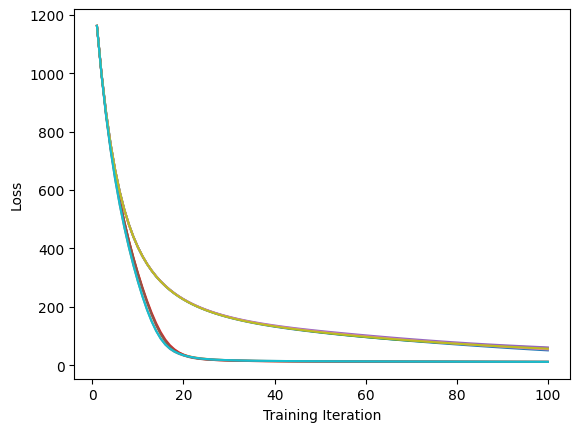

In [5]:
RMSE_list_variational = []
NLPD_list_variational = []
PICP_list_variational = []
MPIW_list_variational = []
TT_list_variational = []

RMSE_list_variational_s = []
NLPD_list_variational_s = []
PICP_list_variational_s = []
MPIW_list_variational_s= []
TT_list_variational_s = []
for _ in range(0,5):
  variational_likelihood_concrete = gpytorch.likelihoods.GaussianLikelihood()
  variational_mean_concrete = gpytorch.means.ConstantMean()
  variational_kernel_concrete = gpytorch.kernels.RBFKernel()
  n_inducing_points = int(len(x_train_concrete)/10)
  # Generate a tensor of random indices
  indices = torch.randperm(x_train_concrete.size(0))
  # Select N random rows
  inducing_points = x_train_concrete[indices][:n_inducing_points]
  variational_model_concrete = variationalGP(variational_likelihood_concrete,
                                          variational_mean_concrete,
                                          variational_kernel_concrete,
                                          inducing_points) # InducingGP defined in utils/models.ipynb
  variational_model_concrete = variational_model_concrete.to(device) # Move model to device, defined in utils/models.ipynb

  # Standardized version
  variational_likelihood_concrete_standardized = gpytorch.likelihoods.GaussianLikelihood()
  variational_mean_concrete_standardized = gpytorch.means.ConstantMean()
  variational_kernel_concrete_standardized = gpytorch.kernels.RBFKernel()
  n_inducing_points = int(len(x_train_concrete_standardized)/10)
  # Generate a tensor of random indices
  indices = torch.randperm(x_train_concrete_standardized.size(0))
  # Select N random rows
  inducing_points_standardized = x_train_concrete_standardized[indices][:n_inducing_points]
  variational_model_concrete_standardized = variationalGP(variational_likelihood_concrete_standardized,
                                                variational_mean_concrete_standardized,
                                                variational_kernel_concrete_standardized,
                                                inducing_points_standardized) # InducingGP defined in utils/models.ipynb
  variational_model_concrete_standardized = variational_model_concrete_standardized.to(device) # Move model to device, defined in utils/models.ipynb



  # Use train_loader_concrete
  train_time_variational_concrete = train_ELBO(variational_model_concrete,
                                  variational_likelihood_concrete,
                                  x_train_concrete,
                                  y_train_concrete,
                                  training_iter= 100) # train is defined in utils/functions.ipynb

  # Standardized version, train_loader_concrete_standardized
  train_time_variational_concrete_standardized = train_ELBO(variational_model_concrete_standardized,
                                                variational_likelihood_concrete_standardized,
                                                x_train_concrete_standardized,
                                                y_train_concrete,
                                                training_iter= 100) # train is defined in utils/functions.ipynb

  with torch.no_grad(), gpytorch.settings.fast_pred_var():
    # predict is defined in utils/functions.ipynb
    predictions_variational_concrete = predict(variational_model_concrete, variational_likelihood_concrete, x_test_concrete)

    RMSE_variational_concrete, NLPD_variational_concrete, PICP_variational_concrete, MPIW_variational_concrete = error_metrics(
        x_test_concrete,
        y_test_concrete,
        predictions_variational_concrete.mean,
        predictions_variational_concrete.variance)# error_metrics defined in utils/functions.ipynb

    RMSE_list_variational.append(RMSE_variational_concrete)
    NLPD_list_variational.append(NLPD_variational_concrete)
    PICP_list_variational.append(PICP_variational_concrete)
    MPIW_list_variational.append(MPIW_variational_concrete)
    TT_list_variational.append(train_time_variational_concrete)
    print("RMSE variational Model: ",RMSE_variational_concrete)
    print("NLPD variational Model: ",NLPD_variational_concrete)
    print("PICP variational Model: ",PICP_variational_concrete)
    print("MPIW variational Model: ",MPIW_variational_concrete)
    print("Time variational Model: ", train_time_variational_concrete)

    # Standardized version
    predictions_variational_concrete_standardized = predict(variational_model_concrete_standardized,
                                        variational_likelihood_concrete_standardized,
                                        x_test_concrete_standardized)

    RMSE_variational_concrete_standardized, NLPD_variational_concrete_standardized, PICP_variational_concrete_standardized, MPIW_variational_concrete_standardized = error_metrics(
        x_test_concrete_standardized,
        y_test_concrete,
        predictions_variational_concrete_standardized.mean,
        predictions_variational_concrete_standardized.variance)# error_metrics defined in utils/functions.ipynb

    RMSE_list_variational_s.append(RMSE_variational_concrete_standardized)
    NLPD_list_variational_s.append(NLPD_variational_concrete_standardized)
    PICP_list_variational_s.append(PICP_variational_concrete_standardized)
    MPIW_list_variational_s.append(MPIW_variational_concrete_standardized)
    TT_list_variational_s.append(train_time_variational_concrete_standardized)
    print("RMSE variational Model Standardized: ",RMSE_variational_concrete_standardized)
    print("NLPD variational Model Standardized: ",NLPD_variational_concrete_standardized)
    print("PICP variational Model Standardized: ",PICP_variational_concrete_standardized)
    print("MPIW variational Model Standardized: ",MPIW_variational_concrete_standardized)
    print("Time variational Model Standardized: ", train_time_variational_concrete_standardized)

# Inducing Points Model

RMSE inducing:  27.579912363057996
NLPD inducing:  55.67345948985211
PICP inducing:  0.1407766990291262
MPIW inducing:  10.42146729728165
Time inducing:  3.698761224746704
RMSE inducing Standardized:  7.6993527
NLPD inducing Standardized:  9.381991386413574
PICP inducing Standardized:  0.4029126213592233
MPIW inducing Standardized:  7.6105423
Time inducing Standardized:  0.9788410663604736


/usr/local/lib/python3.10/dist-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


RMSE inducing:  27.587415131530584
NLPD inducing:  55.967917982417426
PICP inducing:  0.14563106796116504
MPIW inducing:  10.395531575873386
Time inducing:  3.53123140335083
RMSE inducing Standardized:  7.692596
NLPD inducing Standardized:  9.527145385742188
PICP inducing Standardized:  0.4029126213592233
MPIW inducing Standardized:  7.5289454
Time inducing Standardized:  0.9834725856781006
RMSE inducing:  26.886592412442955
NLPD inducing:  53.20097850872826
PICP inducing:  0.13592233009708737
MPIW inducing:  10.408857301932386
Time inducing:  2.4751346111297607
RMSE inducing Standardized:  7.704277
NLPD inducing Standardized:  9.48151683807373
PICP inducing Standardized:  0.39805825242718446
MPIW inducing Standardized:  7.5638795
Time inducing Standardized:  0.9664089679718018


/usr/local/lib/python3.10/dist-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


RMSE inducing:  27.131580429149352
NLPD inducing:  54.17073516710221
PICP inducing:  0.13592233009708737
MPIW inducing:  10.40399154018827
Time inducing:  3.917801856994629
RMSE inducing Standardized:  7.684111
NLPD inducing Standardized:  9.530146598815918
PICP inducing Standardized:  0.3932038834951456
MPIW inducing Standardized:  7.5200944
Time inducing Standardized:  1.37575364112854
RMSE inducing:  27.47097734813659
NLPD inducing:  55.52664008188923
PICP inducing:  0.13592233009708737
MPIW inducing:  10.394828992941468
Time inducing:  3.539156675338745
RMSE inducing Standardized:  7.6975164
NLPD inducing Standardized:  9.297713279724121
PICP inducing Standardized:  0.3932038834951456
MPIW inducing Standardized:  7.6506586
Time inducing Standardized:  0.965376615524292


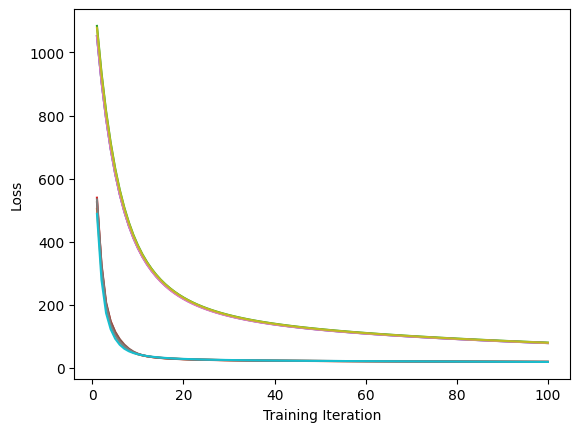

In [6]:
RMSE_list_inducing = []
NLPD_list_inducing = []
PICP_list_inducing = []
MPIW_list_inducing = []
TT_list_inducing = []

RMSE_list_inducing_s = []
NLPD_list_inducing_s = []
PICP_list_inducing_s = []
MPIW_list_inducing_s = []
TT_list_inducing_s = []
for _ in range(0,5):
  inducing_likelihood_concrete = gpytorch.likelihoods.GaussianLikelihood() # Likelihood
  inducing_mean_concrete = gpytorch.means.ConstantMean() # Mean
  inducing_kernel_concrete = gpytorch.kernels.RBFKernel() # Kernel
  # Choose random inital inducing points
  # Generate a tensor of random indices
  indices = torch.randperm(x_train_concrete.size(0))
  # Select N random rows
  inducing_points_amount = int(len(x_train_concrete)/10)
  inducing_points = x_train_concrete[indices][:inducing_points_amount].double()
  inducing_model_concrete = inducingGP(x_train_concrete.double(),
                                  y_train_concrete.double(),
                                  inducing_likelihood_concrete,
                                  inducing_mean_concrete,
                                  inducing_kernel_concrete,
                                  inducing_points) # inducingGP defined in utils/Models.ipynb

  inducing_model_concrete = inducing_model_concrete.to(device) # Move model to device.

  # One with standardized features
  inducing_likelihood_concrete_standardized = gpytorch.likelihoods.GaussianLikelihood() # Likelihood
  inducing_mean_concrete_standardized = gpytorch.means.ConstantMean() # Mean
  inducing_kernel_concrete_standardized = gpytorch.kernels.RBFKernel() # Kernel
  # Generate a tensor of random indices
  indices = torch.randperm(x_train_concrete_standardized.size(0))
  # Select N random rows
  inducing_points_standardized = x_train_concrete_standardized[indices][:inducing_points_amount]
  inducing_model_concrete_standardized = inducingGP(x_train_concrete_standardized,
                                                y_train_concrete,
                                                inducing_likelihood_concrete_standardized,
                                                inducing_mean_concrete_standardized,
                                                inducing_kernel_concrete_standardized,
                                                inducing_points_standardized) # inducingGP defined in utils/Models.ipynb

  inducing_model_concrete_standardized = inducing_model_concrete_standardized.to(device) # Move model to device.






  train_time_inducing_concrete = train(inducing_model_concrete,
                            inducing_likelihood_concrete,
                            x_train_concrete.double(),
                            y_train_concrete.double(),
                            training_iter= 100) # train is defined in utils/functions.ipynb
  # Standardized version
  train_time_inducing_concrete_standardized = train(inducing_model_concrete_standardized,
                                        inducing_likelihood_concrete_standardized,
                                        x_train_concrete_standardized,
                                        y_train_concrete,
                                        training_iter= 100) # train is defined in utils/functions.ipynb




  with torch.no_grad(), gpytorch.settings.fast_pred_var():
    predictions_inducing_concrete = predict(inducing_model_concrete, inducing_likelihood_concrete,
                                      x_test_concrete) # predict is defined in utils/functions.ipynb
    RMSE_inducing_concrete, NLPD_inducing_concrete, PICP_inducing_concrete, MPIW_inducing_concrete = error_metrics(
        x_test_concrete,
        y_test_concrete,
        predictions_inducing_concrete.mean,
        predictions_inducing_concrete.variance)# error_metrics defined in utils/functions.ipynb


    RMSE_list_inducing.append(RMSE_inducing_concrete)
    NLPD_list_inducing.append(NLPD_inducing_concrete)
    PICP_list_inducing.append(PICP_inducing_concrete)
    MPIW_list_inducing.append(MPIW_inducing_concrete)
    TT_list_inducing.append(train_time_inducing_concrete)


    # Standardized version
    predictions_inducing_concrete_standardized = predict(inducing_model_concrete_standardized, inducing_likelihood_concrete_standardized,
                                                    x_test_concrete_standardized) # predict is defined in utils/functions.ipynb

    RMSE_inducing_concrete_standardized, NLPD_inducing_concrete_standardized, PICP_inducing_concrete_standardized, MPIW_inducing_concrete_standardized = error_metrics(
        x_test_concrete_standardized,
        y_test_concrete,
        predictions_inducing_concrete_standardized.mean,
        predictions_inducing_concrete_standardized.variance)# error_metrics defined in utils/functions.ipynb


    RMSE_list_inducing_s.append(RMSE_inducing_concrete_standardized)
    NLPD_list_inducing_s.append(NLPD_inducing_concrete_standardized)
    PICP_list_inducing_s.append(PICP_inducing_concrete_standardized)
    MPIW_list_inducing_s.append(MPIW_inducing_concrete_standardized)
    TT_list_inducing_s.append(train_time_inducing_concrete_standardized)

    print("RMSE inducing: ",RMSE_inducing_concrete)
    print("NLPD inducing: ",NLPD_inducing_concrete)
    print("PICP inducing: ",PICP_inducing_concrete)
    print("MPIW inducing: ",MPIW_inducing_concrete)
    print("Time inducing: ", train_time_inducing_concrete)

    print("RMSE inducing Standardized: ",RMSE_inducing_concrete_standardized)
    print("NLPD inducing Standardized: ",NLPD_inducing_concrete_standardized)
    print("PICP inducing Standardized: ",PICP_inducing_concrete_standardized)
    print("MPIW inducing Standardized: ",MPIW_inducing_concrete_standardized)
    print("Time inducing Standardized: ", train_time_inducing_concrete_standardized)

# Exact Gaussian Process Model

RMSE Exact-GP:  22.185034
NLPD Exact-GP:  23.081106185913086
PICP Exact-GP:  0.21844660194174756
MPIW Exact-GP:  13.377076
Time Exact-GP:  14.764289140701294

RMSE Exact-GP Standardized:  6.7946706
NLPD Exact-GP Standardized:  5.416935920715332
PICP Exact-GP Standardized:  0.5339805825242718
MPIW Exact-GP Standardized:  9.859524
Time Exact-GP Standardized:  3.0298168659210205
RMSE Exact-GP:  22.184193
NLPD Exact-GP:  23.099523544311523
PICP Exact-GP:  0.21844660194174756
MPIW Exact-GP:  13.365928
Time Exact-GP:  15.969724416732788

RMSE Exact-GP Standardized:  6.800721
NLPD Exact-GP Standardized:  5.423503398895264
PICP Exact-GP Standardized:  0.5388349514563107
MPIW Exact-GP Standardized:  9.859403
Time Exact-GP Standardized:  4.54559326171875
RMSE Exact-GP:  22.184868
NLPD Exact-GP:  23.08038330078125
PICP Exact-GP:  0.21844660194174756
MPIW Exact-GP:  13.376463
Time Exact-GP:  14.763038396835327

RMSE Exact-GP Standardized:  6.788796
NLPD Exact-GP Standardized:  5.411172389984131
PI

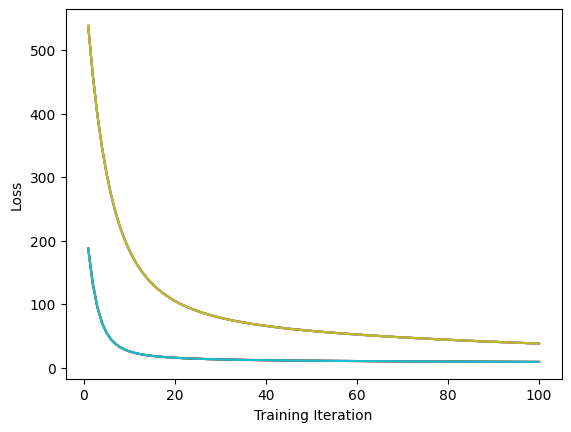

In [7]:
RMSE_list_exact = []
NLPD_list_exact = []
PICP_list_exact = []
MPIW_list_exact = []
TT_list_exact = []

RMSE_list_exact_s = []
NLPD_list_exact_s = []
PICP_list_exact_s = []
MPIW_list_exact_s = []
TT_list_exact_s = []
for _ in range(0,5):
  exact_likelihood_concrete = gpytorch.likelihoods.GaussianLikelihood() # Likelihood
  exact_mean_concrete = gpytorch.means.ConstantMean() # Mean
  exact_kernel_concrete = gpytorch.kernels.MaternKernel() # Kernel
  exact_model_concrete = exactGP(x_train_concrete,
                              y_train_concrete,
                              exact_likelihood_concrete,
                              exact_mean_concrete,
                              exact_kernel_concrete) # exactGP defined in utils/Models.ipynb
  exact_model_concrete = exact_model_concrete.to(device) # Move model to device, defined in utils/models.ipynb


  # Standardized version

  exact_likelihood_concrete_standardized = gpytorch.likelihoods.GaussianLikelihood() # Likelihood
  exact_mean_concrete_standardized = gpytorch.means.ConstantMean() # Mean
  exact_kernel_concrete_standardized = gpytorch.kernels.MaternKernel() # Kernel
  exact_model_concrete_standardized = exactGP(x_train_concrete_standardized,
                              y_train_concrete,
                              exact_likelihood_concrete_standardized,
                              exact_mean_concrete_standardized,
                              exact_kernel_concrete_standardized) # exactGP defined in utils/Models.ipynb
  exact_model_concrete_standardized = exact_model_concrete_standardized.to(device) # Move model to device, defined in utils/models.ipynb



  train_time_exact_concrete = train(exact_model_concrete,
                                  exact_likelihood_concrete,
                                  x_train_concrete,
                                  y_train_concrete,
                                  training_iter= 100) # train is defined in utils/functions.ipynb


  train_time_exact_concrete_standardized = train(exact_model_concrete_standardized,
                                  exact_likelihood_concrete_standardized,
                                  x_train_concrete_standardized,
                                  y_train_concrete,
                                  training_iter= 100) # train is defined in utils/functions.ipynb




  # Evaluate
  with torch.no_grad(), gpytorch.settings.fast_pred_var():
    predictions_exact_concrete = predict(exact_model_concrete, exact_likelihood_concrete,
                                      x_test_concrete) # predict is defined in utils/functions.ipynb
    RMSE_exact_concrete, NLPD_exact_concrete, PICP_exact_concrete, MPIW_exact_concrete = error_metrics(
        x_test_concrete,
        y_test_concrete,
        predictions_exact_concrete.mean,
        predictions_exact_concrete.variance)# error_metrics defined in utils/functions.ipynb


    RMSE_list_exact.append(RMSE_exact_concrete)
    NLPD_list_exact.append(NLPD_exact_concrete)
    PICP_list_exact.append(PICP_exact_concrete)
    MPIW_list_exact.append(MPIW_exact_concrete)
    TT_list_exact.append(train_time_exact_concrete)
  # Standardized

  # Evaluate
  with torch.no_grad(), gpytorch.settings.fast_pred_var():
    predictions_exact_concrete_standardized = predict(exact_model_concrete_standardized, exact_likelihood_concrete_standardized,
                                      x_test_concrete_standardized) # predict is defined in utils/functions.ipynb
    RMSE_exact_concrete_standardized, NLPD_exact_concrete_standardized, PICP_exact_concrete_standardized, MPIW_exact_concrete_standardized = error_metrics(
        x_test_concrete_standardized,
        y_test_concrete,
        predictions_exact_concrete_standardized.mean,
        predictions_exact_concrete_standardized.variance)# error_metrics defined in utils/functions.ipynb

    RMSE_list_exact_s.append(RMSE_exact_concrete_standardized)
    NLPD_list_exact_s.append(NLPD_exact_concrete_standardized)
    PICP_list_exact_s.append(PICP_exact_concrete_standardized)
    MPIW_list_exact_s.append(MPIW_exact_concrete_standardized)
    TT_list_exact_s.append(train_time_exact_concrete_standardized)

    print("RMSE Exact-GP: ",RMSE_exact_concrete)
    print("NLPD Exact-GP: ",NLPD_exact_concrete)
    print("PICP Exact-GP: ",PICP_exact_concrete)
    print("MPIW Exact-GP: ",MPIW_exact_concrete)
    print("Time Exact-GP: ", train_time_exact_concrete)

    print("")

    print("RMSE Exact-GP Standardized: ",RMSE_exact_concrete_standardized)
    print("NLPD Exact-GP Standardized: ",NLPD_exact_concrete_standardized)
    print("PICP Exact-GP Standardized: ",PICP_exact_concrete_standardized)
    print("MPIW Exact-GP Standardized: ",MPIW_exact_concrete_standardized)
    print("Time Exact-GP Standardized: ", train_time_exact_concrete_standardized)

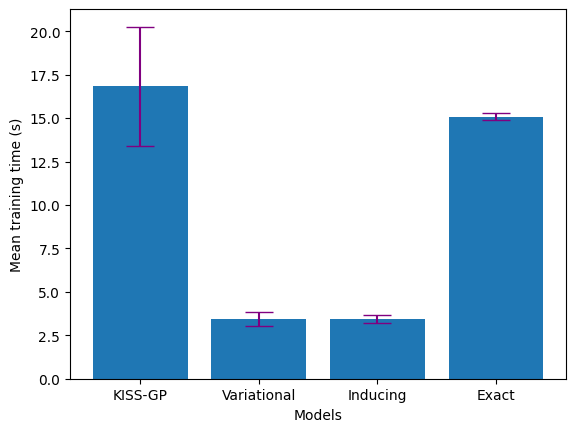

In [8]:
# Calculate standard errors training time
standard_errors_tt = [np.std(x) / np.sqrt(len(x)) for x in
                   [TT_list_KISSGP, TT_list_variational, TT_list_inducing, TT_list_exact]]

# Calculate means
means_tt = [np.mean(x) for x in
         [TT_list_KISSGP, TT_list_variational, TT_list_inducing, TT_list_exact]]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Model names
models = ['KISS-GP', 'Variational', 'Inducing', 'Exact']

# Plot error bars
ax.bar(models, means_tt, yerr=standard_errors_tt, align='center', ecolor='purple', capsize=10)

ax.set_xlabel('Models')
ax.set_ylabel('Mean training time (s)')
plt.savefig("error_tt_concrete.pdf")

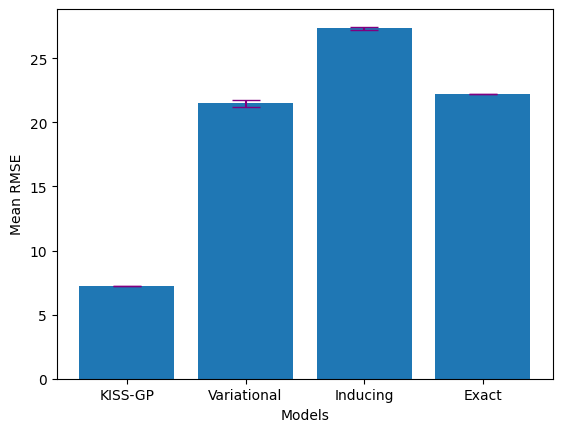

In [9]:
# Calculate standard errors
standard_errors_rmse = [np.std(rmse_values) / np.sqrt(len(rmse_values)) for rmse_values in
                   [RMSE_list_KISSGP, RMSE_list_variational, RMSE_list_inducing, RMSE_list_exact]]

# Calculate means
means_rmse = [np.mean(rmse_values) for rmse_values in
         [RMSE_list_KISSGP, RMSE_list_variational, RMSE_list_inducing, RMSE_list_exact]]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Model names
models = ['KISS-GP', 'Variational', 'Inducing', 'Exact']

# Plot error bars
ax.bar(models, means_rmse, yerr=standard_errors_rmse, align='center', ecolor='purple', capsize=10)

ax.set_xlabel('Models')
ax.set_ylabel('Mean RMSE')
plt.savefig("error_rmse_concrete.pdf")

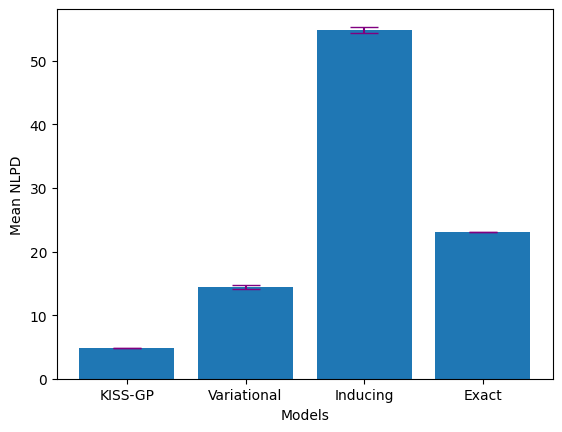

In [10]:
# Calculate standard errors
standard_errors_nlpd = [np.std(x) / np.sqrt(len(x)) for x in
                   [NLPD_list_KISSGP, NLPD_list_variational, NLPD_list_inducing, NLPD_list_exact]]

# Calculate means
means_nlpd = [np.mean(x) for x in
         [NLPD_list_KISSGP, NLPD_list_variational, NLPD_list_inducing, NLPD_list_exact]]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Model names
models = ['KISS-GP', 'Variational', 'Inducing', 'Exact']

# Plot error bars
ax.bar(models, means_nlpd, yerr=standard_errors_nlpd, align='center', ecolor='purple', capsize=10)

ax.set_xlabel('Models')
ax.set_ylabel('Mean NLPD')
plt.savefig("error_nlpd_concrete.pdf")

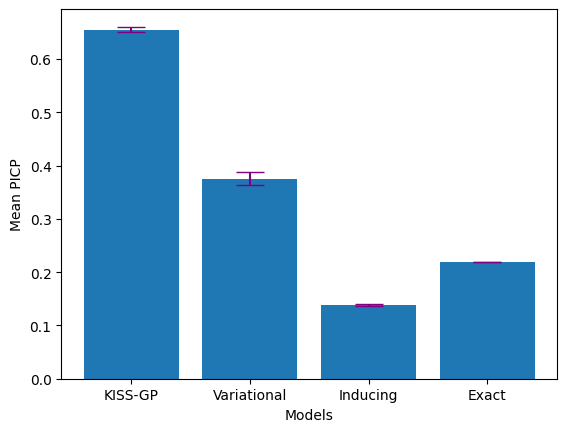

In [11]:
# Calculate standard errors
standard_errors_picp = [np.std(x) / np.sqrt(len(x)) for x in
                   [PICP_list_KISSGP, PICP_list_variational,  PICP_list_inducing, PICP_list_exact]]

# Calculate means
means_picp = [np.mean(x) for x in
         [PICP_list_KISSGP, PICP_list_variational, PICP_list_inducing, PICP_list_exact]]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Model names
models = ['KISS-GP', 'Variational', 'Inducing', 'Exact']

# Plot error bars
ax.bar(models, means_picp, yerr=standard_errors_picp, align='center', ecolor='purple', capsize=10)

ax.set_xlabel('Models')
ax.set_ylabel('Mean PICP')
plt.savefig("error_picp_concrete.pdf")

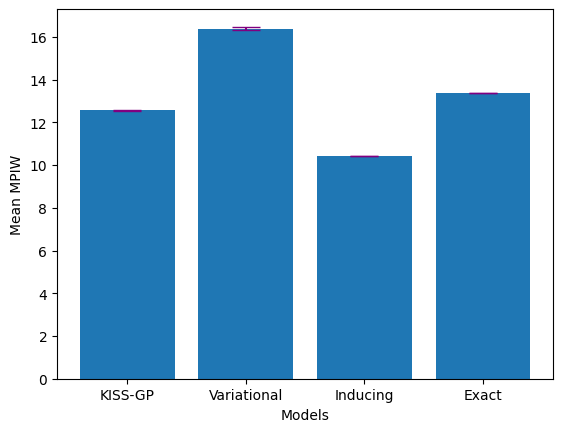

In [12]:
# Calculate standard errors
standard_errors_mpiw = [np.std(x) / np.sqrt(len(x)) for x in
                   [MPIW_list_KISSGP,MPIW_list_variational, MPIW_list_inducing, MPIW_list_exact]]

# Calculate means
means_mpiw = [np.mean(x) for x in
         [MPIW_list_KISSGP, MPIW_list_variational, MPIW_list_inducing, MPIW_list_exact]]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Model names
models = ['KISS-GP', 'Variational', 'Inducing', 'Exact']

# Plot error bars
ax.bar(models, means_mpiw, yerr=standard_errors_mpiw, align='center', ecolor='purple', capsize=10)

ax.set_xlabel('Models')
ax.set_ylabel('Mean MPIW')
plt.savefig("error_mpiw_concrete.pdf")

# Standardized or not

In [13]:
# Calculate standard errors training time
standard_errors_tt_s = [np.std(x) / np.sqrt(len(x)) for x in
                   [TT_list_KISSGP_s, TT_list_variational_s, TT_list_inducing_s, TT_list_exact_s]]

# Calculate means
means_tt_s = [np.mean(x) for x in
         [TT_list_KISSGP_s, TT_list_variational_s, TT_list_inducing_s, TT_list_exact_s]]



# Calculate standard errors
standard_errors_rmse_s = [np.std(rmse_values) / np.sqrt(len(rmse_values)) for rmse_values in
                   [RMSE_list_KISSGP_s, RMSE_list_variational_s, RMSE_list_inducing_s, RMSE_list_exact_s]]

# Calculate means
means_rmse_s = [np.mean(rmse_values) for rmse_values in
         [RMSE_list_KISSGP_s, RMSE_list_variational_s, RMSE_list_inducing_s, RMSE_list_exact_s]]



# Calculate standard errors
standard_errors_nlpd_s = [np.std(x) / np.sqrt(len(x)) for x in
                   [NLPD_list_KISSGP_s, NLPD_list_variational_s, NLPD_list_inducing_s, NLPD_list_exact_s]]

# Calculate means
means_nlpd_s = [np.mean(x) for x in
         [NLPD_list_KISSGP_s, NLPD_list_variational_s, NLPD_list_inducing_s, NLPD_list_exact_s]]



# Calculate standard errors
standard_errors_picp_s = [np.std(x) / np.sqrt(len(x)) for x in
                   [PICP_list_KISSGP_s, PICP_list_variational_s,  PICP_list_inducing_s, PICP_list_exact_s]]

# Calculate means
means_picp_s = [np.mean(x) for x in
         [PICP_list_KISSGP_s, PICP_list_variational_s, PICP_list_inducing_s, PICP_list_exact_s]]




# Calculate standard errors
standard_errors_mpiw_s = [np.std(x) / np.sqrt(len(x)) for x in
                   [MPIW_list_KISSGP_s,MPIW_list_variational_s, MPIW_list_inducing_s, MPIW_list_exact_s]]

# Calculate means
means_mpiw_s = [np.mean(x) for x in
         [MPIW_list_KISSGP_s, MPIW_list_variational_s, MPIW_list_inducing_s, MPIW_list_exact_s]]



tt_compare = []
rmse_compare = []
nlpd_compare = []
picp_compare = []
mpiw_compare = []

for tt, tt_s in zip(means_tt, means_tt_s):
  tt_compare.append(tt)
  tt_compare.append(tt_s)



for rmse, rmse_s in zip(means_rmse, means_rmse_s):
  rmse_compare.append(rmse)
  rmse_compare.append(rmse_s)



for nlpd, nlpd_s in zip(means_nlpd, means_nlpd_s):
  nlpd_compare.append(nlpd)
  nlpd_compare.append(nlpd_s)



for picp, picp_s in zip(means_picp, means_picp_s):
  picp_compare.append(picp)
  picp_compare.append(picp_s)



for mpiw, mpiw_s in zip(means_mpiw, means_mpiw_s):
  mpiw_compare.append(mpiw)
  mpiw_compare.append(mpiw_s)




# ----

tt_compare_error = []
rmse_compare_error = []
nlpd_compare_error = []
picp_compare_error = []
mpiw_compare_error = []

for tt, tt_s in zip(standard_errors_tt, standard_errors_tt_s):
  tt_compare_error.append(tt)
  tt_compare_error.append(tt_s)



for rmse, rmse_s in zip(standard_errors_rmse, standard_errors_rmse_s):
  rmse_compare_error.append(rmse)
  rmse_compare_error.append(rmse_s)



for nlpd, nlpd_s in zip(standard_errors_nlpd, standard_errors_nlpd_s):
  nlpd_compare_error.append(nlpd)
  nlpd_compare_error.append(nlpd_s)



for picp, picp_s in zip(standard_errors_picp, standard_errors_picp_s):
  picp_compare_error.append(picp)
  picp_compare_error.append(picp_s)



for mpiw, mpiw_s in zip(standard_errors_mpiw, standard_errors_mpiw_s):
  mpiw_compare_error.append(mpiw)
  mpiw_compare_error.append(mpiw_s)



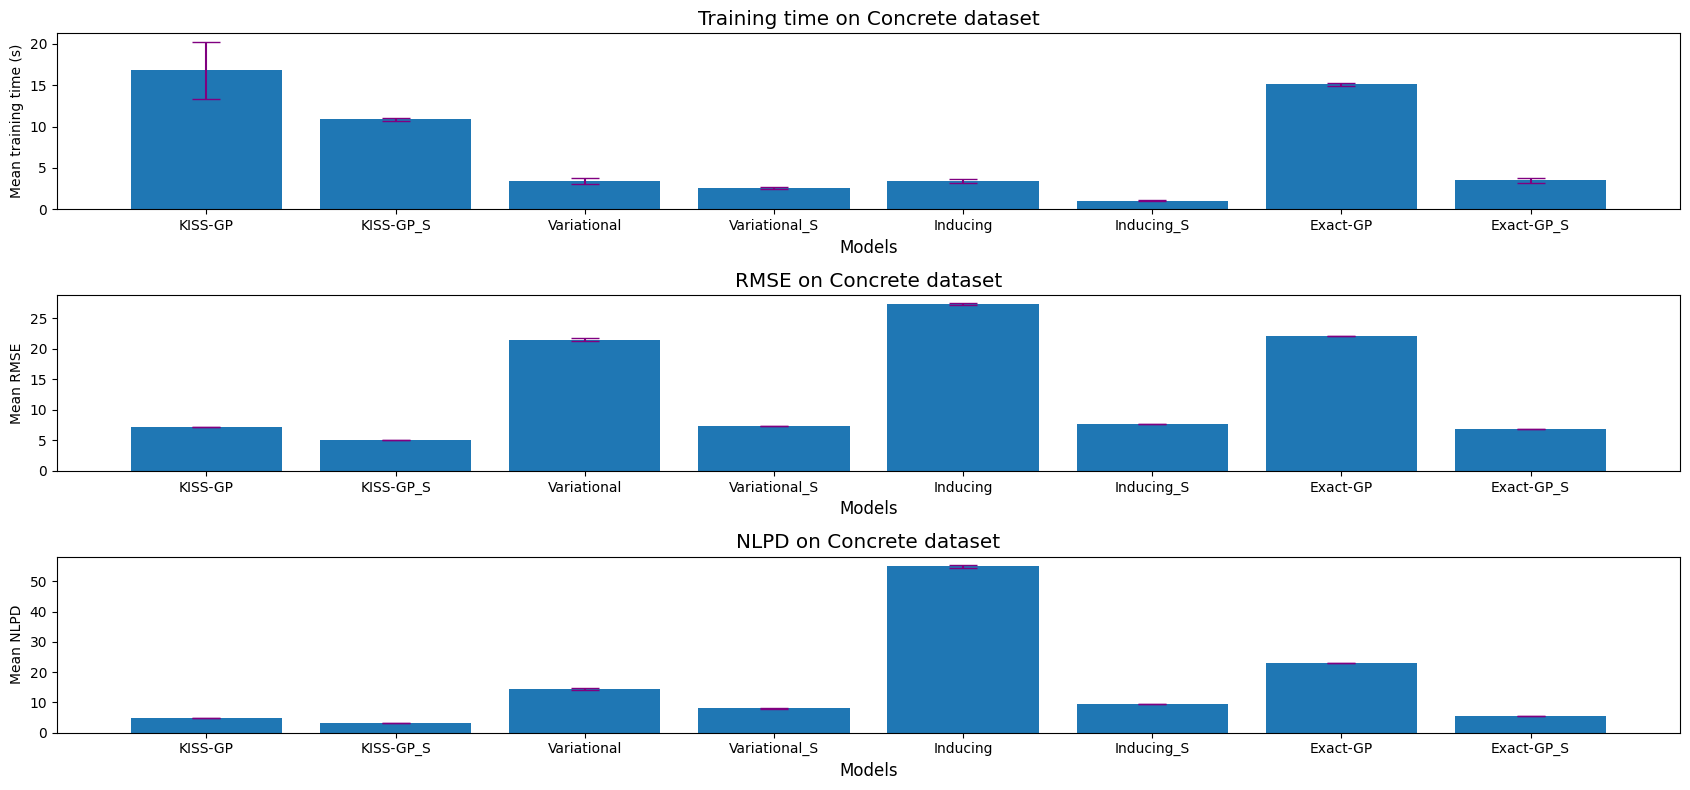

In [41]:
# standardized or not
from matplotlib.gridspec import GridSpec

gs = GridSpec(3, 1)  # 3 rows, 1 columns

fig = plt.figure(figsize=(17, 8))

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])



models_compare = ["KISS-GP", "KISS-GP_S", "Variational", "Variational_S",  "Inducing", "Inducing_S", "Exact-GP", "Exact-GP_S"]

axes = [ax1, ax2, ax3]  # List of axes
data = [tt_compare, rmse_compare, nlpd_compare]
standard_errors1 = [tt_compare_error, rmse_compare_error, nlpd_compare_error]
titles = ["Training time on Concrete dataset", "RMSE on Concrete dataset", "NLPD on Concrete dataset"]

# Plot data
for i, ax in enumerate(axes):
    ax.bar(models_compare, data[i], yerr=standard_errors1[i], ecolor='purple', capsize=10)

    ax.set_title(titles[i], size = "x-large")
    ax.set_xlabel("Models", size = "large")

ax1.set_ylabel("Mean training time (s)")
ax2.set_ylabel("Mean RMSE")
ax3.set_ylabel("Mean NLPD")
plt.tight_layout()
plt.savefig("metrics_concrete_compare1.pdf")
plt.show()


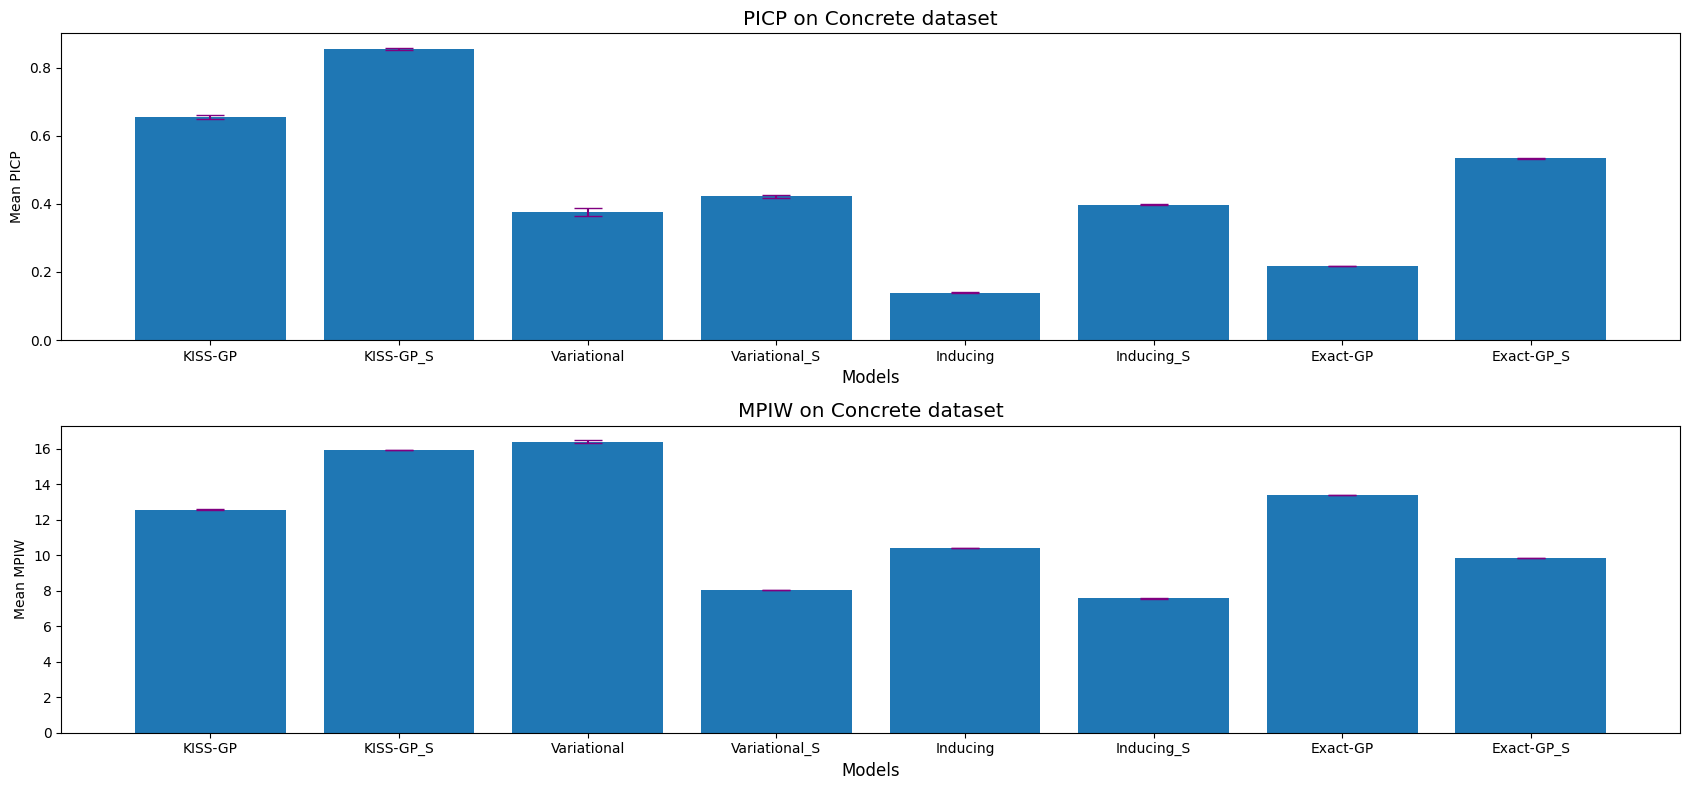

In [42]:
# standardized or not
from matplotlib.gridspec import GridSpec

gs = GridSpec(2, 1)  # 2 rows, 1 columns

fig = plt.figure(figsize=(17, 8))

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])




models_compare = ["KISS-GP", "KISS-GP_S", "Variational", "Variational_S",  "Inducing", "Inducing_S", "Exact-GP", "Exact-GP_S"]

axes = [ax1, ax2]  # List of axes
data = [picp_compare, mpiw_compare]
standard_errors1 = [picp_compare_error, mpiw_compare_error]
titles = ["PICP on Concrete dataset", "MPIW on Concrete dataset"]

# Plot data
for i, ax in enumerate(axes):
    ax.bar(models_compare, data[i], yerr=standard_errors1[i], ecolor='purple', capsize=10)

    ax.set_title(titles[i], size = "x-large")
    ax.set_xlabel("Models", size = "large")

ax1.set_ylabel("Mean PICP")
ax2.set_ylabel("Mean MPIW")
plt.tight_layout()
plt.savefig("metrics_concrete_compare2.pdf")
plt.show()

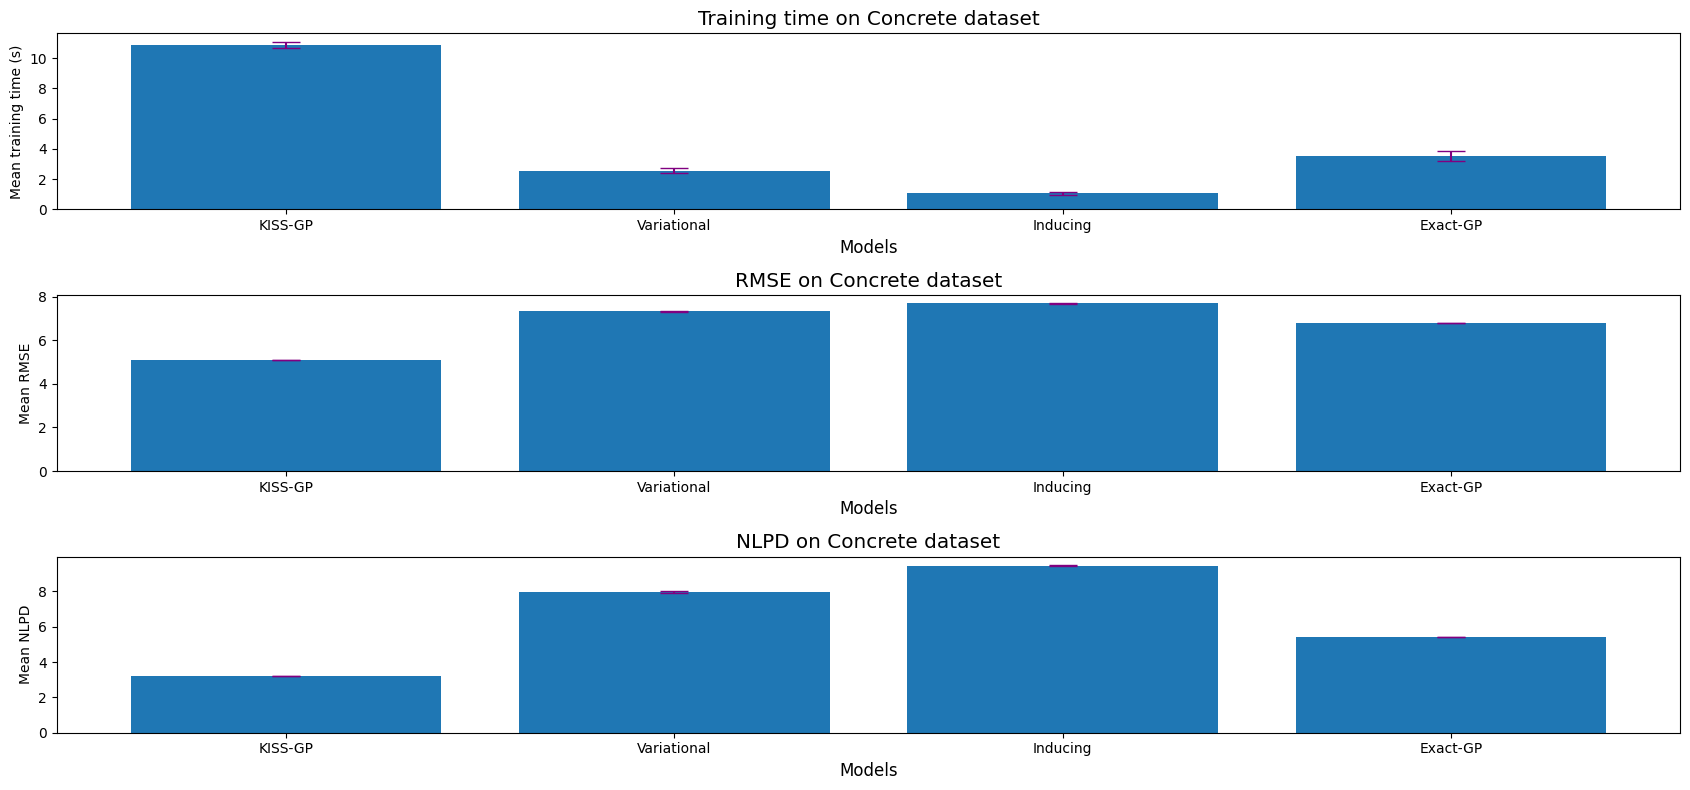

In [39]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(3, 1)  # 2 rows, 6 columns

fig = plt.figure(figsize=(17, 8))

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])  # Spans columns 0-1
ax2 = fig.add_subplot(gs[1, 0])  # Spans columns 2-3
ax3 = fig.add_subplot(gs[2, 0])  # Spans columns 4-5


axes = [ax1, ax2, ax3]  # List of axes
data = [means_tt_s, means_rmse_s, means_nlpd_s]
standard_errors1 = [standard_errors_tt_s, standard_errors_rmse_s, standard_errors_nlpd_s]
titles = ["Training time on Concrete dataset", "RMSE on Concrete dataset", "NLPD on Concrete dataset"]

# Plot data
for i, ax in enumerate(axes):
    ax.bar(models, data[i], yerr=standard_errors1[i], ecolor='purple', capsize=10)

    ax.set_title(titles[i], size = "x-large")
    ax.set_xlabel("Models", size = "large")

ax1.set_ylabel("Mean training time (s)")
ax2.set_ylabel("Mean RMSE")
ax3.set_ylabel("Mean NLPD")
plt.tight_layout()
plt.savefig("metrics_concrete1.pdf")
plt.show()

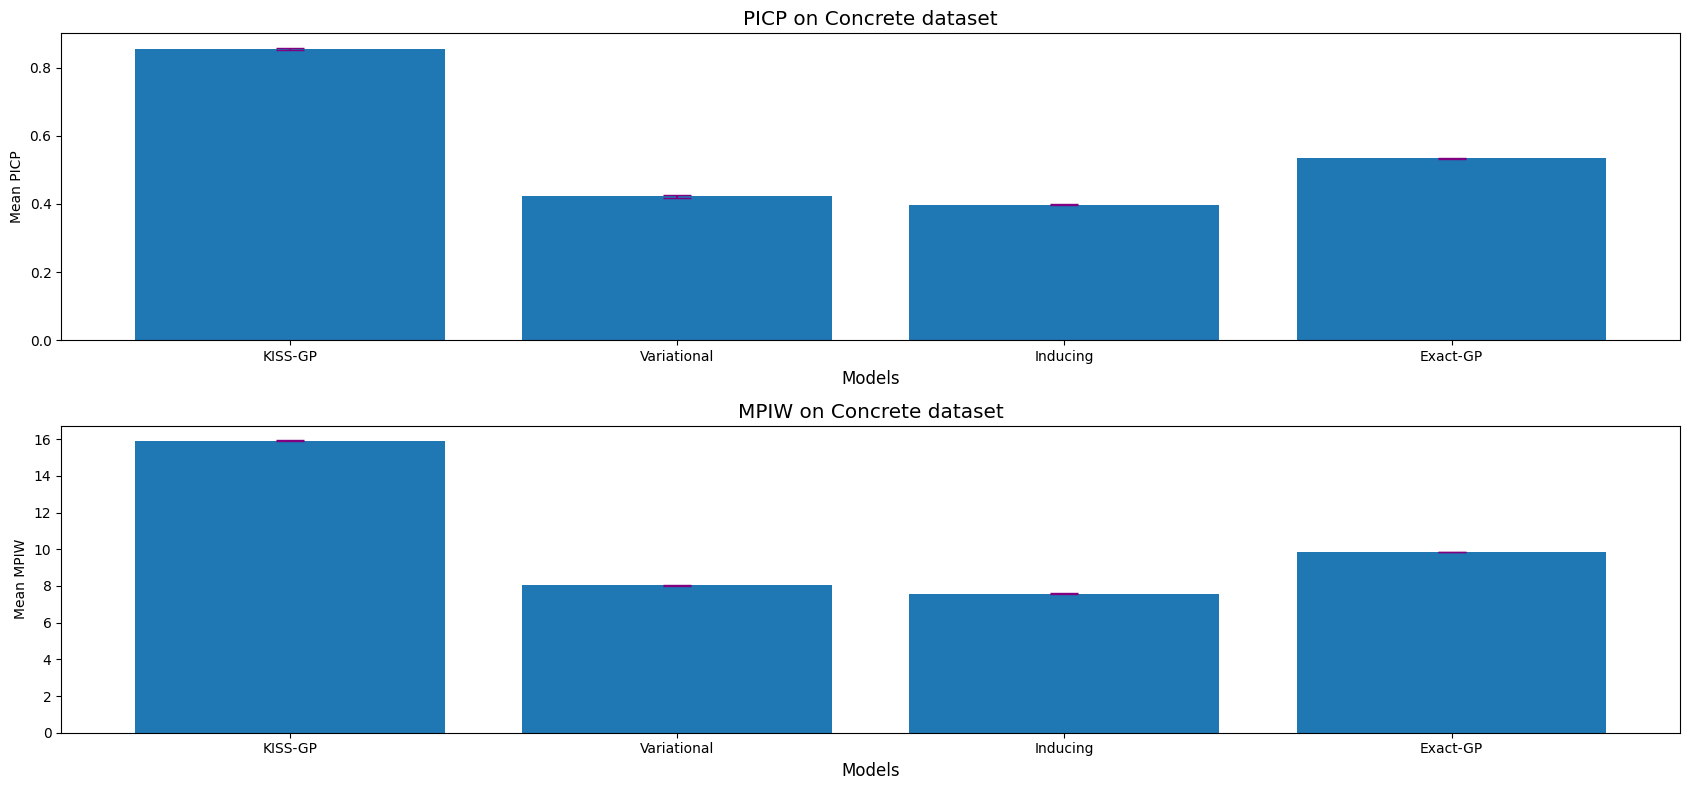

In [40]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(2, 1)  # 1 rows, 6 columns

fig = plt.figure(figsize=(17,8))

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])


axes = [ax1, ax2]  # List of axes
data = [means_picp_s, means_mpiw_s]
standard_errors2 = [standard_errors_picp_s, standard_errors_mpiw_s]
titles = ["PICP on Concrete dataset", "MPIW on Concrete dataset"]

# Plot data
for i, ax in enumerate(axes):
    ax.bar(models, data[i], yerr=standard_errors2[i], ecolor='purple', capsize=10)

    ax.set_title(titles[i], size = "x-large")
    ax.set_xlabel("Models", size = "large")

ax1.set_ylabel("Mean PICP")
ax2.set_ylabel("Mean MPIW")
plt.tight_layout()
plt.savefig("metrics_concrete2.pdf")
plt.show()

# Display Results

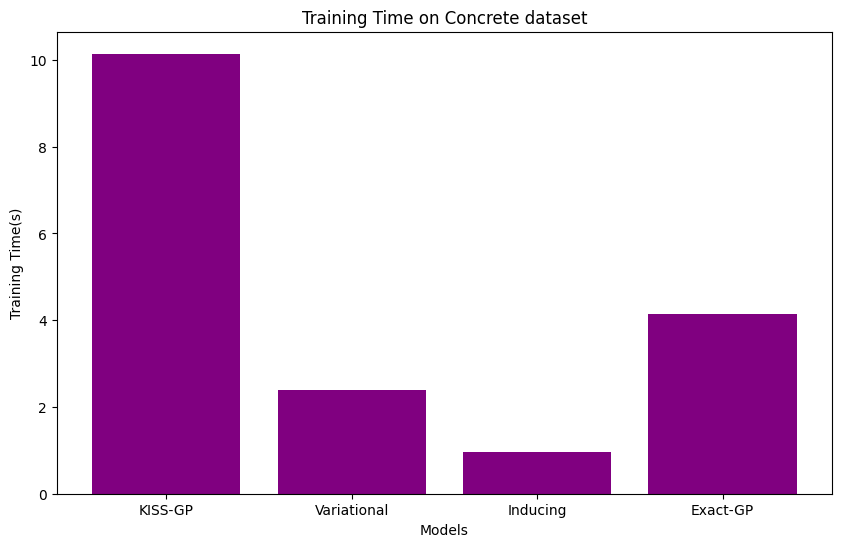

In [18]:
# Training times
models = ["KISS-GP", "Variational", "Inducing", "Exact-GP"]
times_concrete = [train_time_KISSGP_concrete_standardized, train_time_variational_concrete_standardized, train_time_inducing_concrete_standardized, train_time_exact_concrete_standardized]
plot_bar(models, times_concrete, "Training Time on Concrete dataset", "Models", "Training Time(s)") # plot_bar defined in utils/function.ipynb

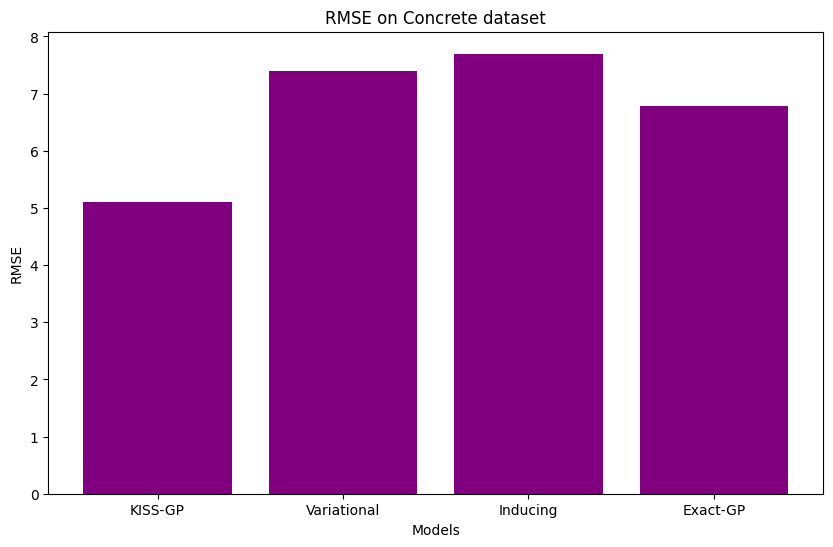

In [19]:
# RMSE
models = ["KISS-GP", "Variational", "Inducing", "Exact-GP"]
RMSE_concrete = [RMSE_KISSGP_concrete_standardized, RMSE_variational_concrete_standardized, RMSE_inducing_concrete_standardized,RMSE_exact_concrete_standardized]
plot_bar(models, RMSE_concrete, "RMSE on Concrete dataset", "Models", "RMSE") # plot_bar defined in utils/function.ipynb

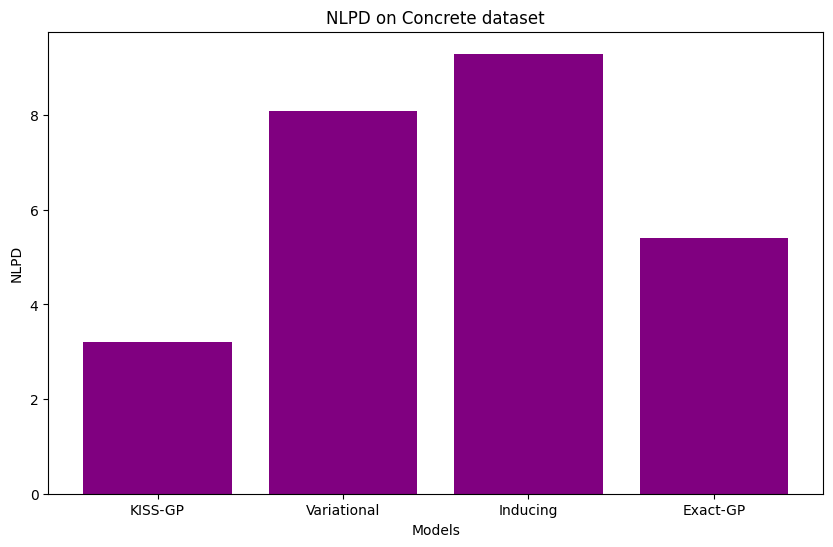

In [20]:
# NLPD
models = ["KISS-GP", "Variational", "Inducing", "Exact-GP"]
NLPD_concrete = [NLPD_KISSGP_concrete_standardized, NLPD_variational_concrete_standardized, NLPD_inducing_concrete_standardized,NLPD_exact_concrete_standardized]
plot_bar(models, NLPD_concrete, "NLPD on Concrete dataset", "Models", "NLPD") # plot_bar defined in utils/function.ipynb

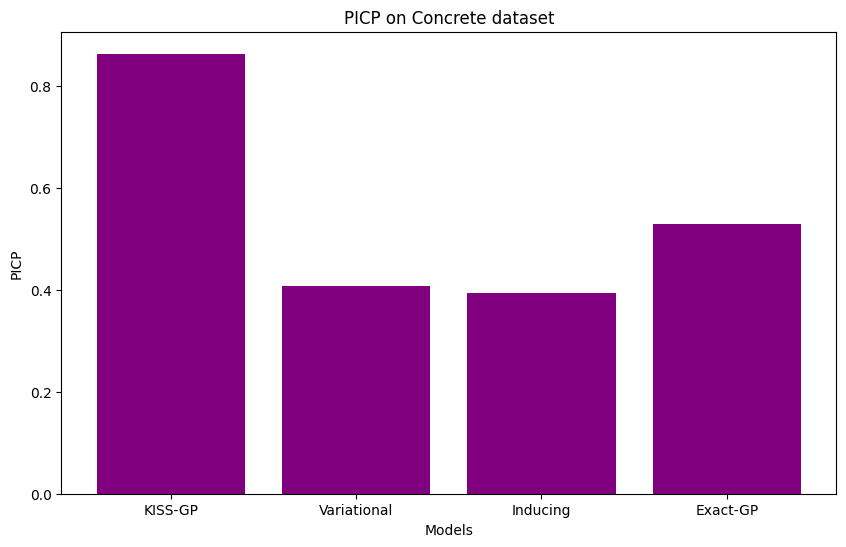

In [21]:
# PICP
models = ["KISS-GP", "Variational", "Inducing", "Exact-GP"]
PICP_concrete = [PICP_KISSGP_concrete_standardized, PICP_variational_concrete_standardized, PICP_inducing_concrete_standardized,PICP_exact_concrete_standardized]
plot_bar(models, PICP_concrete, "PICP on Concrete dataset", "Models", "PICP") # plot_bar defined in utils/function.ipynb

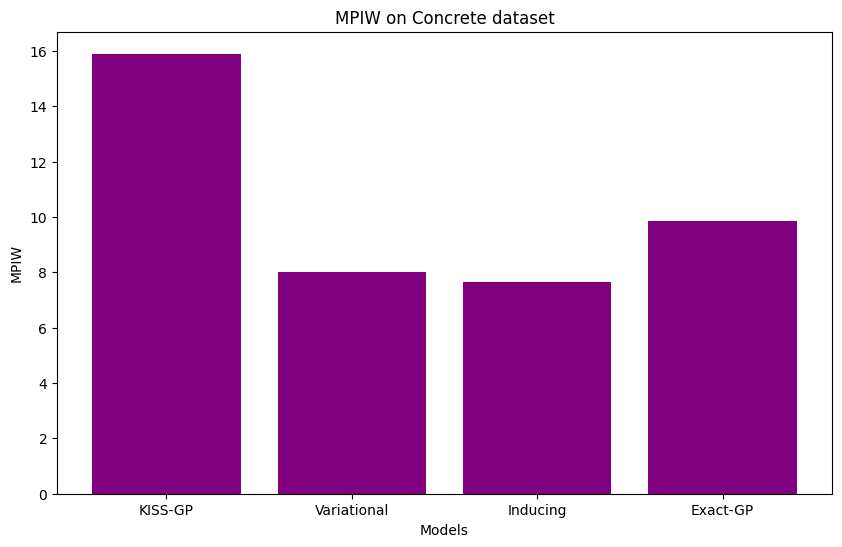

In [22]:
# MPIW
models = ["KISS-GP", "Variational", "Inducing", "Exact-GP"]
MPIW_concrete = [MPIW_KISSGP_concrete_standardized, MPIW_variational_concrete_standardized, MPIW_inducing_concrete_standardized, MPIW_exact_concrete_standardized]
plot_bar(models, MPIW_concrete, "MPIW on Concrete dataset", "Models", "MPIW") # plot_bar defined in utils/function.ipynb

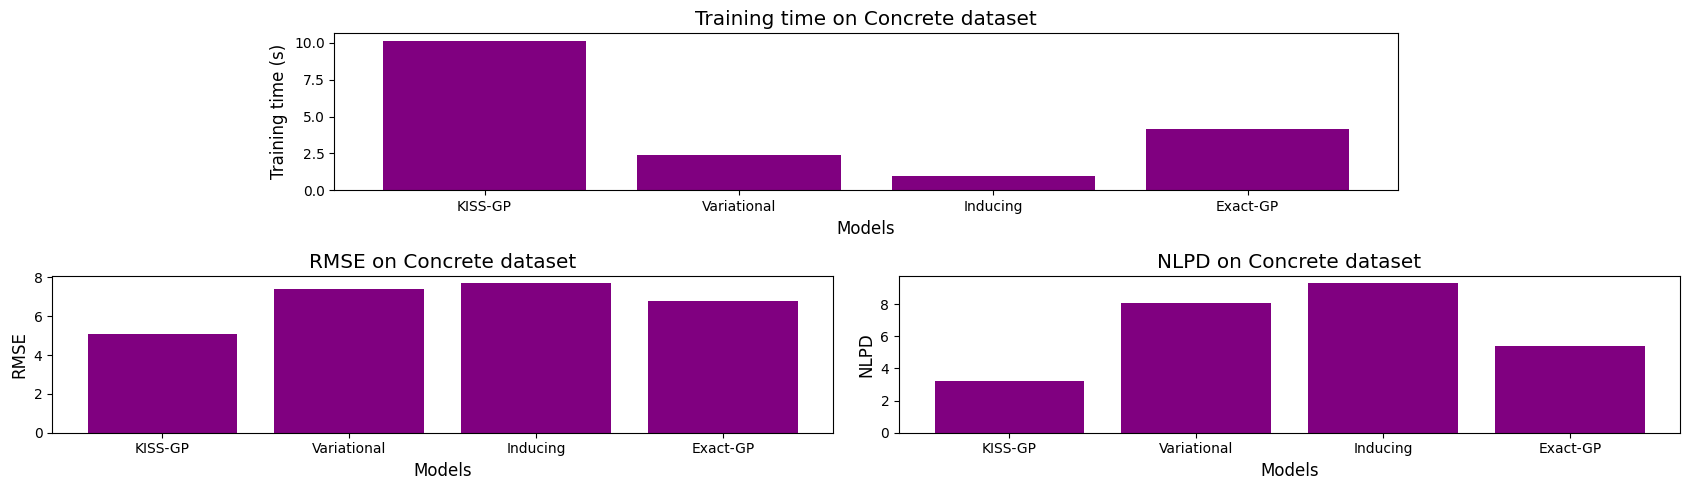

In [23]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(2, 6)  # 2 rows, 6 columns

fig = plt.figure(figsize=(17, 5))

# Create subplots
ax1 = fig.add_subplot(gs[0, 1:5])
ax2 = fig.add_subplot(gs[1, 0:3])
ax3 = fig.add_subplot(gs[1, 3:6])


axes = [ax1, ax2, ax3]  # List of axes
data = [times_concrete, RMSE_concrete, NLPD_concrete]
titles = ["Training time on Concrete dataset", "RMSE on Concrete dataset", "NLPD on Concrete dataset"]

# Plot data
for i, ax in enumerate(axes):
    ax.bar(models, data[i], color='purple')
    ax.set_title(titles[i], size = "x-large")
    ax.set_xlabel("Models", size = "large")
    ax.set_ylabel(titles[i].split(" ")[0], size = "large")

ax1.set_ylabel("Training time (s)")
plt.tight_layout()
#plt.savefig("metrics_concrete1.pdf")
plt.show()

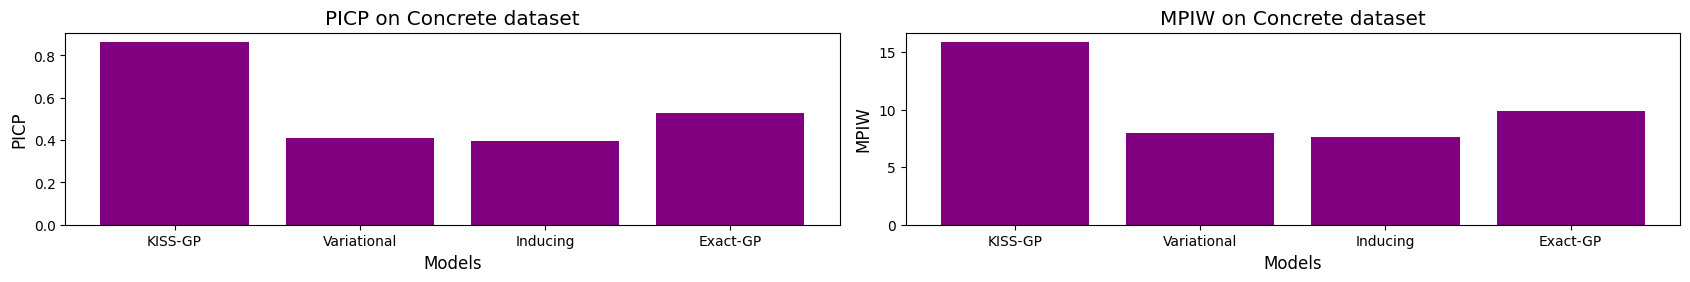

In [24]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(2, 6)  # 2 rows, 6 columns

fig = plt.figure(figsize=(17, 5))

# Create subplots
ax1 = fig.add_subplot(gs[0, 0:3])
ax2 = fig.add_subplot(gs[0, 3:6])


axes = [ax1, ax2]  # List of axes
data = [PICP_concrete, MPIW_concrete]
titles = ["PICP on Concrete dataset", "MPIW on Concrete dataset"]

# Plot data
for i, ax in enumerate(axes):
    ax.bar(models, data[i], color='purple')
    ax.set_title(titles[i], size = "x-large")
    ax.set_xlabel("Models", size = "large")
    ax.set_ylabel(titles[i].split(" ")[0], size = "large")

plt.tight_layout()
#plt.savefig("metrics_concrete2.pdf")
plt.show()

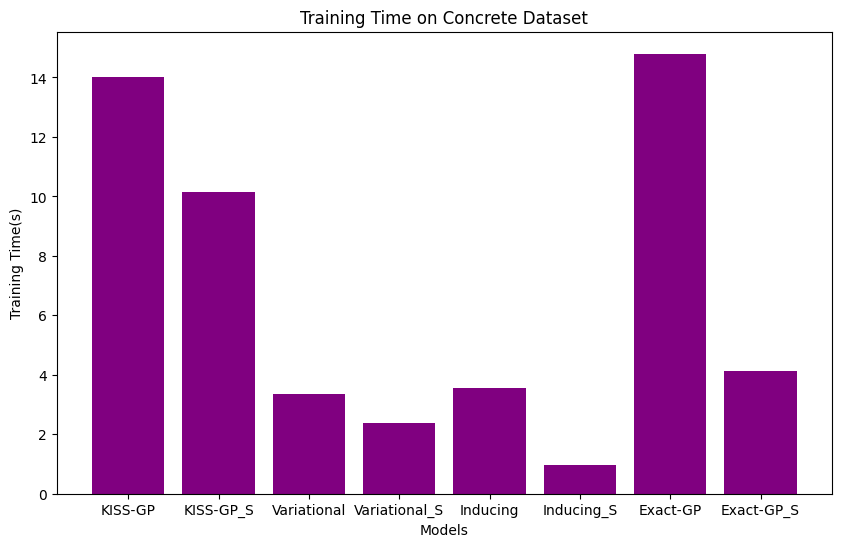

In [25]:
# Standardized or not?
# Training Time
models_compare = ["KISS-GP", "KISS-GP_S", "Variational", "Variational_S",  "Inducing", "Inducing_S", "Exact-GP", "Exact-GP_S"]
time_compare = [train_time_KISSGP_concrete, train_time_KISSGP_concrete_standardized,
                train_time_variational_concrete, train_time_variational_concrete_standardized,
                train_time_inducing_concrete, train_time_inducing_concrete_standardized,
                train_time_exact_concrete, train_time_exact_concrete_standardized]
plot_bar(models_compare, time_compare, "Training Time on Concrete Dataset", "Models", "Training Time(s)") # plot_bar defined in utils/function.ipynb

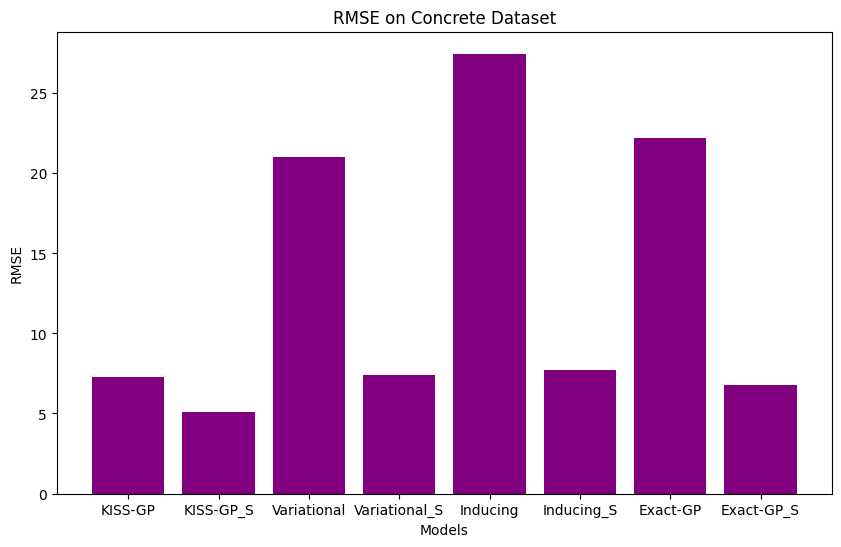

In [26]:
# Standardized or not?
# RMSE
models_compare = ["KISS-GP", "KISS-GP_S", "Variational", "Variational_S",  "Inducing", "Inducing_S", "Exact-GP", "Exact-GP_S"]
RMSE_compare = [RMSE_KISSGP_concrete, RMSE_KISSGP_concrete_standardized,
                RMSE_variational_concrete, RMSE_variational_concrete_standardized,
                RMSE_inducing_concrete, RMSE_inducing_concrete_standardized,
                RMSE_exact_concrete,RMSE_exact_concrete_standardized]
plot_bar(models_compare, RMSE_compare, "RMSE on Concrete Dataset", "Models", "RMSE") # plot_bar defined in utils/function.ipynb

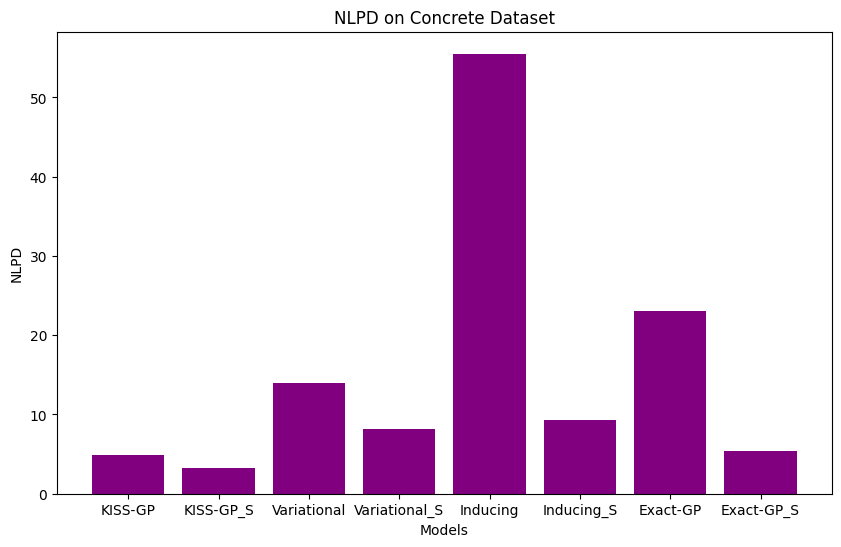

In [27]:
# Standardized or not?
# NLPD
models_compare = ["KISS-GP", "KISS-GP_S", "Variational", "Variational_S",  "Inducing", "Inducing_S", "Exact-GP", "Exact-GP_S"]
NLPD_compare = [NLPD_KISSGP_concrete, NLPD_KISSGP_concrete_standardized,
                NLPD_variational_concrete, NLPD_variational_concrete_standardized,
                NLPD_inducing_concrete, NLPD_inducing_concrete_standardized,
                NLPD_exact_concrete, NLPD_exact_concrete_standardized]
plot_bar(models_compare, NLPD_compare, "NLPD on Concrete Dataset", "Models", "NLPD") # plot_bar defined in utils/function.ipynb

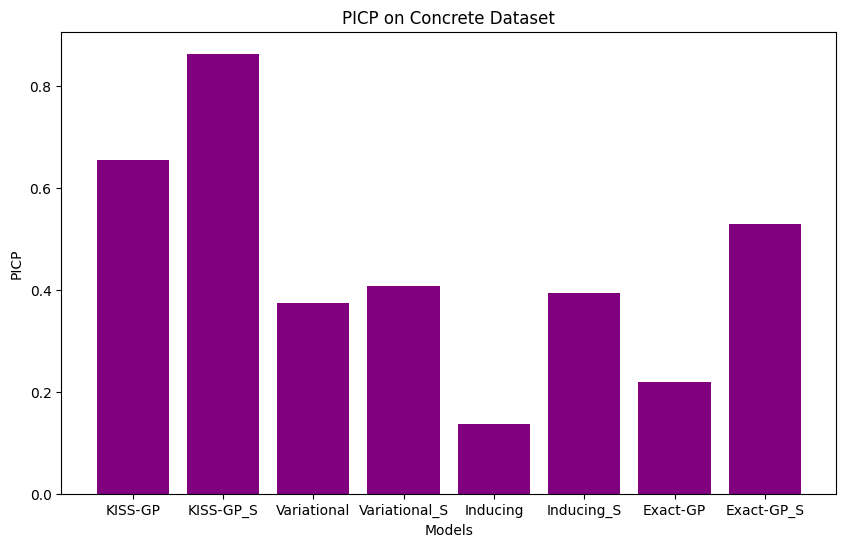

In [28]:
# Standardized or not?
# PICP
models_compare = ["KISS-GP", "KISS-GP_S", "Variational", "Variational_S",  "Inducing", "Inducing_S", "Exact-GP", "Exact-GP_S"]
PICP_compare = [PICP_KISSGP_concrete, PICP_KISSGP_concrete_standardized,
                PICP_variational_concrete, PICP_variational_concrete_standardized,
                PICP_inducing_concrete, PICP_inducing_concrete_standardized,
                PICP_exact_concrete, PICP_exact_concrete_standardized]
plot_bar(models_compare, PICP_compare, "PICP on Concrete Dataset", "Models", "PICP") # plot_bar defined in utils/function.ipynb

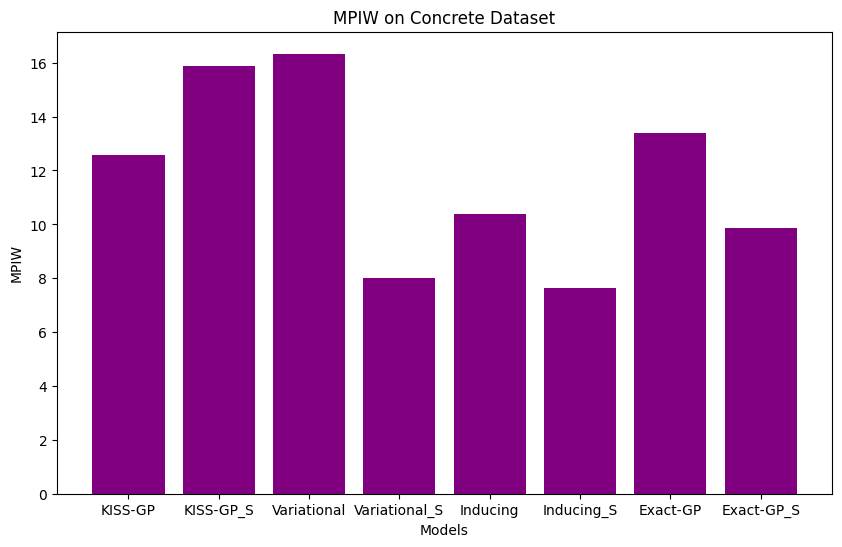

In [29]:
# Standardized or not?
# MPIW
models_compare = ["KISS-GP", "KISS-GP_S", "Variational", "Variational_S",  "Inducing", "Inducing_S", "Exact-GP", "Exact-GP_S"]
MPIW_compare = [MPIW_KISSGP_concrete, MPIW_KISSGP_concrete_standardized,
                MPIW_variational_concrete, MPIW_variational_concrete_standardized,
                MPIW_inducing_concrete, MPIW_inducing_concrete_standardized,
                MPIW_exact_concrete, MPIW_exact_concrete_standardized]
plot_bar(models_compare, MPIW_compare, "MPIW on Concrete Dataset", "Models", "MPIW") # plot_bar defined in utils/function.ipynb

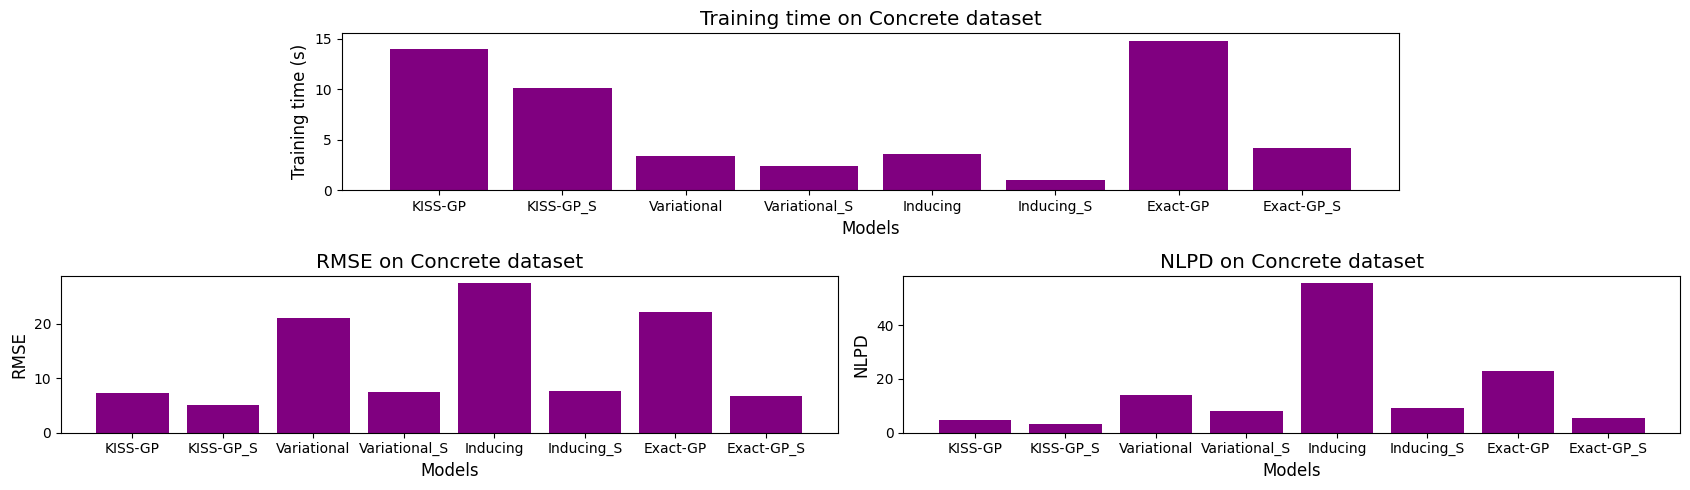

In [30]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(2, 6)  # 2 rows, 6 columns

fig = plt.figure(figsize=(17, 5))
# Create subplots
ax1 = fig.add_subplot(gs[0, 1:5])
ax2 = fig.add_subplot(gs[1, 0:3])
ax3 = fig.add_subplot(gs[1, 3:6])

axes = [ax1, ax2, ax3]  # List of axes


data = [time_compare, RMSE_compare, NLPD_compare]
titles = ["Training time on Concrete dataset", "RMSE on Concrete dataset", "NLPD on Concrete dataset"]

# Plot data
for i, ax in enumerate(axes):
    ax.bar(models_compare, data[i], color='purple')
    ax.set_title(titles[i], size = "x-large")
    ax.set_xlabel("Models", size = "large")
    ax.set_ylabel(titles[i].split(" ")[0], size = "large")

ax1.set_ylabel("Training time (s)")
plt.tight_layout()
#plt.savefig("metrics_concrete_compare1.pdf")
plt.show()

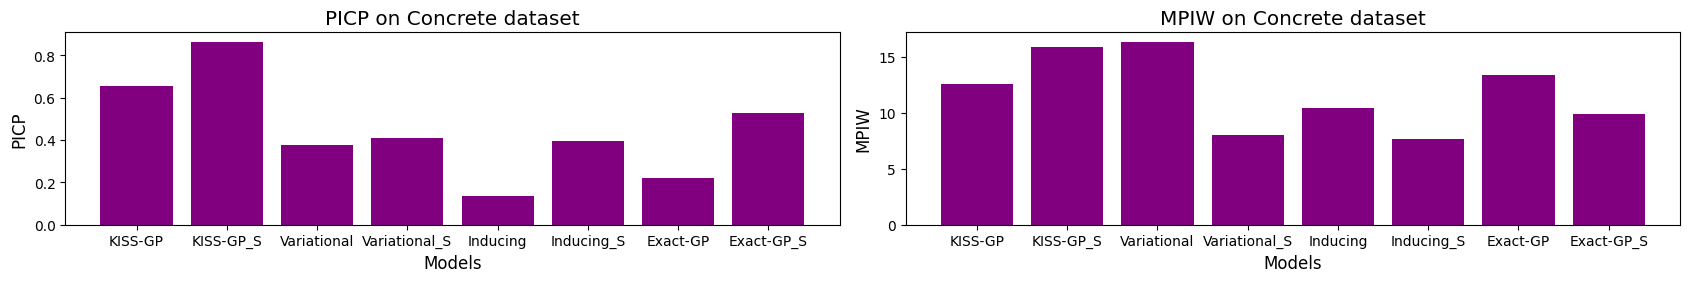

In [31]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(2, 6)  # 2 rows, 6 columns

fig = plt.figure(figsize=(17, 5))
# Create subplots
ax1 = fig.add_subplot(gs[0, 0:3])  # Spans columns 1-4
ax2 = fig.add_subplot(gs[0, 3:6])  # Spans columns 0-2


axes = [ax1, ax2]  # List of axes


data = [PICP_compare, MPIW_compare]
titles = ["PICP on Concrete dataset", "MPIW on Concrete dataset"]

# Plot data
for i, ax in enumerate(axes):
    ax.bar(models_compare, data[i], color='purple')
    ax.set_title(titles[i], size = "x-large")
    ax.set_xlabel("Models", size = "large")
    ax.set_ylabel(titles[i].split(" ")[0], size = "large")

plt.tight_layout()
#plt.savefig("metrics_concrete_compare2.pdf")
plt.show()